# Session 2: Twoway

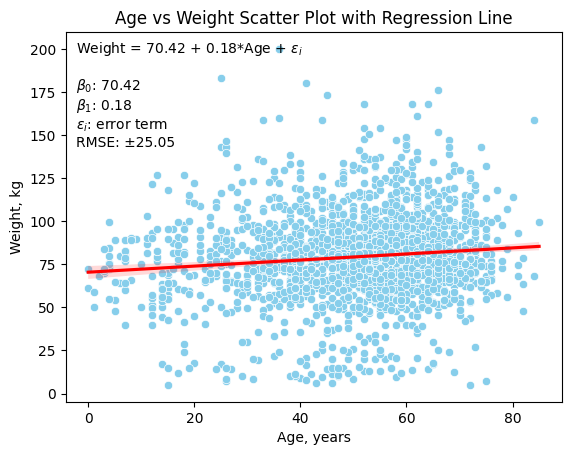

In [1]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import io 

# Load the data from the URL using requests
url = 'https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt'
response = requests.get(url)
content = response.content.decode('utf-8')
file = io.StringIO(content)
data = pd.read_csv(file, sep='\t')

# Extract the 'age' and 'don_wgt_kg' columns
age = data['age']
weight = data['don_wgt_kg']

# Run a simple linear regression to get the parameters
X = sm.add_constant(age) # adding a constant (intercept term) to the model
model = sm.OLS(weight, X).fit()
beta0 = model.params[0]
beta1 = model.params[1]

# Compute the Root Mean Squared Error (RMSE)
y_true = weight
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Create a figure and axis
fig, ax = plt.subplots()

# Generate a scatter plot
sns.scatterplot(x=age, y=weight, color='skyblue', ax=ax)

# Generate a regression line
sns.regplot(x=age, y=weight, scatter=False, color='red', ax=ax)

# Adding text for beta0, beta1, error term, and RMSE
formula = f'Weight = {beta0:.2f} + {beta1:.2f}*Age + $\\epsilon_i$'
params = f'$\\beta_0$: {beta0:.2f}\n$\\beta_1$: {beta1:.2f}\n$\\epsilon_i$: error term\nRMSE: ±{rmse:.2f}'
ax.text(0.02, 0.98, formula + '\n\n' + params, transform=ax.transAxes, verticalalignment='top')

# Styling
plt.title('Age vs Weight Scatter Plot with Regression Line')
plt.xlabel('Age, years')
plt.ylabel('Weight, kg')

# Save the figure
plt.savefig('age_weight_scatterplot.png')
plt.show()
